# 1. 필요한 모듈 불러오기

In [1]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

* tensorflow, sequential 무조건 모델 만드려면 불러오기

* dense --> fully connected될 때 쓰기

* numpy , plot


# 2. train set, test set 설정하기

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

* train data : x는 왼쪽 동그라미, 13개의 데이터, 5000개..../// y data

* test data: 13개. y는 하나의 값 (price)

## 2-1. data 확인

In [3]:
x_train.shape

(404, 13)

* train할 data로 404개 사용. 13가지 column. --> (404*13)

* data (sample)의 개수 --> 13개 짜리의 vector가 총 404개 있다.

In [4]:
x_test.shape

(102, 13)

* test data는 102개. 13가지 column. --> (102*13)

In [5]:
y_train.shape

(404,)

* train할 data로 404개 사용.

* (404,1). 1은 생략.

In [6]:
y_test.shape

(102,)

* test data는 102개.

* 하나 짜리 값이 총 102개.

In [7]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

# 3. model 만들기

In [17]:
# 1. Sequential 설정
model = Sequential()

# 2. Dense한 layer 만들기. hidden layer는 총 한 개로, node는 10개 / input node는 13개 / activation function으로 relu를 사용.    
model.add(Dense(10, input_shape=[13], activation = 'relu'))
# --> 입력값이 13개. 출력값이 1개인 것을 그림으로 생각할 수 있어야 함. // 훈련해야 하는 값은 화살표에 있는 값들.

# 3. Dense한 layer 만들기. node는 1개. input node 설정해주지 않은 이유? 이미 layer의 node가 10개인지 알고있기 때문임.
model.add(Dense(1))

# 4. compile, optimizer = rmsprop, 손실함수 = mse
model.compile(optimizer='rmsprop', loss='mse')


# relu : 음의 값은 0으로, 0 이상이면 입력 값을 그대로 출력하는 함수 (주로 회귀 문제에서 사용)
# 최적화 : 학습속도를 빠르고 안정적이게 하는 방식
# 손실함수 : 신경망 성능의 '나쁨'을 나타내는 지표 --> 현재의 신경망이 훈련데이터를 얼마나 잘 처리하지 못하느냐를 보여줌.
# 평균 제곱 오차(Mean Squared Error, MSE) : 회귀에서 많이 쓰이는 손실함수

## 3-1. model 확인 : model에 관한 정보 보여줌

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### 시험문제? 중요한 점들.

* para # 은 y = ax + b에서 b부분.

* parameter num 에서 140이 나온 이유? (14 * 10 --> 14는 input 동그라미 개수. 10은 hidden layer의 동그라미 개수)
       화살표가 하나일 경우 y=ax+b --> 훈련해야 할 weight(=parameter) 화살표는 두 개가 됨. (필기 참고) 즉, 동그라미가 입력으로 열 세개 들어가 있지만, 실제로는 마지막에 동그라미 하나가(1로서) 더 붙음. 즉 화살표가 실질적으로는 14개가 있음. // para는 1개 더 들어감.
       
* 정리하면, 입력값이 x1, x2, .. x13 그리고 "1까지" 총 14개 x hidden layer의 node 10개 = param# 140

* output node는 한 개이며 hidden layer의 node에도 1이라는 node를 마찬가지로 추가함.

* 즉 , 14(입력값13+1(1)) x hidden layer 10 
  후 hideen layer 10+1(1) = 11. 
    
* activation은 hidden layers에 줄 수 있다. 안줘도 상관 없음.

* activation은 output에 regression인 경우 아무것도 주지 않음. classification인 경우 sigmoid나 softmax.

## 3-2. model 모양 확인

In [13]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


* None에 1이 들어가 있다고 보면 됨.

* nerual network에 여러개의 data set 넣어도 된다 --> output의 개수가 많아지는 것뿐임.

* 따라서 None은 data 개수에 따라 변할 수 있기 때문에 비워놓음 (정해지지 않음)

# 4. fitting

* batch : 묶음을 뜻함. 예컨대 100개의 sample을 예측 한다고 가정하자. 각 sample에 대한 예측식을 계산하여 예측을 하기 시작하는데 이 경우 총 100번의 계산을 하게 된다. 여기서, batch size를 50이라고 가정한다면, 예측식에 50개의 sample을 넣어 계산하도록 만든다. 즉 컴퓨터는 2번의 계산만을 하게 되어 속도가 빨라질 수 있다.

* batch size default 값 32.

### None = batch_size? 한꺼번에 얼만큼의 data를 처리할 것인가 중요하다.

In [22]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 0s 82us/sample - loss: 16.9119
Epoch 2/1000
404/404 [==============================] - 0s 94us/sample - loss: 17.7409
Epoch 3/1000
404/404 [==============================] - 0s 88us/sample - loss: 16.8592
Epoch 4/1000
404/404 [==============================] - 0s 121us/sample - loss: 19.7093
Epoch 5/1000
404/404 [==============================] - 0s 88us/sample - loss: 16.4192
Epoch 6/1000
404/404 [==============================] - 0s 84us/sample - loss: 16.8322
Epoch 7/1000
404/404 [==============================] - 0s 74us/sample - loss: 17.0185
Epoch 8/1000
404/404 [==============================] - 0s 116us/sample - loss: 17.1595
Epoch 9/1000
404/404 [==============================] - 0s 96us/sample - loss: 16.9804
Epoch 10/1000
404/404 [==============================] - 0s 104us/sample - loss: 16.1140
Epoch 11/1000
404/404 [==============================] - 0s 109us/sample - loss: 17.4457
Epoch 12/1000
404/404 [==============

Epoch 93/1000
404/404 [==============================] - 0s 96us/sample - loss: 16.0800
Epoch 94/1000
404/404 [==============================] - 0s 84us/sample - loss: 16.8723
Epoch 95/1000
404/404 [==============================] - 0s 109us/sample - loss: 15.7694
Epoch 96/1000
404/404 [==============================] - 0s 101us/sample - loss: 16.7037
Epoch 97/1000
404/404 [==============================] - 0s 89us/sample - loss: 17.3095
Epoch 98/1000
404/404 [==============================] - 0s 97us/sample - loss: 17.5363
Epoch 99/1000
404/404 [==============================] - 0s 111us/sample - loss: 18.6588
Epoch 100/1000
404/404 [==============================] - 0s 106us/sample - loss: 16.2084
Epoch 101/1000
404/404 [==============================] - 0s 118us/sample - loss: 16.6624
Epoch 102/1000
404/404 [==============================] - 0s 123us/sample - loss: 16.1473
Epoch 103/1000
404/404 [==============================] - 0s 106us/sample - loss: 17.5470
Epoch 104/1000
404/40

404/404 [==============================] - 0s 89us/sample - loss: 15.4026
Epoch 185/1000
404/404 [==============================] - 0s 96us/sample - loss: 16.9582
Epoch 186/1000
404/404 [==============================] - 0s 87us/sample - loss: 17.0140
Epoch 187/1000
404/404 [==============================] - 0s 106us/sample - loss: 14.9790
Epoch 188/1000
404/404 [==============================] - 0s 79us/sample - loss: 17.0487
Epoch 189/1000
404/404 [==============================] - 0s 96us/sample - loss: 16.4176
Epoch 190/1000
404/404 [==============================] - 0s 79us/sample - loss: 16.0933
Epoch 191/1000
404/404 [==============================] - 0s 77us/sample - loss: 18.7443
Epoch 192/1000
404/404 [==============================] - 0s 81us/sample - loss: 15.1096
Epoch 193/1000
404/404 [==============================] - 0s 99us/sample - loss: 16.7348
Epoch 194/1000
404/404 [==============================] - 0s 99us/sample - loss: 17.4009
Epoch 195/1000
404/404 [===========

404/404 [==============================] - 0s 138us/sample - loss: 17.2097
Epoch 276/1000
404/404 [==============================] - 0s 114us/sample - loss: 15.3319
Epoch 277/1000
404/404 [==============================] - 0s 121us/sample - loss: 16.0401
Epoch 278/1000
404/404 [==============================] - 0s 114us/sample - loss: 16.8695
Epoch 279/1000
404/404 [==============================] - 0s 109us/sample - loss: 15.7642
Epoch 280/1000
404/404 [==============================] - 0s 76us/sample - loss: 17.3711
Epoch 281/1000
404/404 [==============================] - 0s 104us/sample - loss: 17.6182
Epoch 282/1000
404/404 [==============================] - 0s 111us/sample - loss: 17.1133
Epoch 283/1000
404/404 [==============================] - 0s 106us/sample - loss: 18.5957
Epoch 284/1000
404/404 [==============================] - 0s 96us/sample - loss: 15.1863
Epoch 285/1000
404/404 [==============================] - 0s 111us/sample - loss: 17.1482
Epoch 286/1000
404/404 [===

404/404 [==============================] - 0s 96us/sample - loss: 16.2307
Epoch 367/1000
404/404 [==============================] - 0s 81us/sample - loss: 16.3299
Epoch 368/1000
404/404 [==============================] - 0s 116us/sample - loss: 17.0041
Epoch 369/1000
404/404 [==============================] - ETA: 0s - loss: 21.23 - 0s 88us/sample - loss: 15.7114
Epoch 370/1000
404/404 [==============================] - 0s 148us/sample - loss: 17.9559
Epoch 371/1000
404/404 [==============================] - 0s 91us/sample - loss: 14.8262
Epoch 372/1000
404/404 [==============================] - 0s 84us/sample - loss: 16.9994
Epoch 373/1000
404/404 [==============================] - 0s 99us/sample - loss: 16.5245
Epoch 374/1000
404/404 [==============================] - 0s 123us/sample - loss: 16.0466
Epoch 375/1000
404/404 [==============================] - 0s 96us/sample - loss: 17.1583
Epoch 376/1000
404/404 [==============================] - 0s 91us/sample - loss: 15.0989
Epoch 377

404/404 [==============================] - 0s 153us/sample - loss: 17.2903
Epoch 458/1000
404/404 [==============================] - 0s 136us/sample - loss: 16.1903
Epoch 459/1000
404/404 [==============================] - 0s 172us/sample - loss: 16.1821
Epoch 460/1000
404/404 [==============================] - 0s 111us/sample - loss: 15.0176
Epoch 461/1000
404/404 [==============================] - 0s 138us/sample - loss: 17.7422
Epoch 462/1000
404/404 [==============================] - 0s 104us/sample - loss: 14.7164
Epoch 463/1000
404/404 [==============================] - 0s 111us/sample - loss: 16.1425
Epoch 464/1000
404/404 [==============================] - 0s 118us/sample - loss: 16.6503
Epoch 465/1000
404/404 [==============================] - 0s 173us/sample - loss: 16.2138
Epoch 466/1000
404/404 [==============================] - 0s 133us/sample - loss: 15.3253
Epoch 467/1000
404/404 [==============================] - 0s 128us/sample - loss: 16.3971
Epoch 468/1000
404/404 [=

Epoch 549/1000
404/404 [==============================] - 0s 99us/sample - loss: 15.6115
Epoch 550/1000
404/404 [==============================] - 0s 89us/sample - loss: 16.9677
Epoch 551/1000
404/404 [==============================] - 0s 86us/sample - loss: 15.3045
Epoch 552/1000
404/404 [==============================] - 0s 77us/sample - loss: 16.9021
Epoch 553/1000
404/404 [==============================] - 0s 106us/sample - loss: 16.5888
Epoch 554/1000
404/404 [==============================] - 0s 101us/sample - loss: 17.5662
Epoch 555/1000
404/404 [==============================] - 0s 104us/sample - loss: 16.3870
Epoch 556/1000
404/404 [==============================] - ETA: 0s - loss: 8.995 - 0s 85us/sample - loss: 15.3858
Epoch 557/1000
404/404 [==============================] - 0s 79us/sample - loss: 16.2025
Epoch 558/1000
404/404 [==============================] - 0s 101us/sample - loss: 14.5720
Epoch 559/1000
404/404 [==============================] - 0s 95us/sample - loss: 1

404/404 [==============================] - 0s 79us/sample - loss: 16.8282
Epoch 641/1000
404/404 [==============================] - 0s 94us/sample - loss: 15.6453
Epoch 642/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.6973
Epoch 643/1000
404/404 [==============================] - 0s 104us/sample - loss: 16.3482
Epoch 644/1000
404/404 [==============================] - 0s 160us/sample - loss: 15.4154
Epoch 645/1000
404/404 [==============================] - ETA: 0s - loss: 17.77 - 0s 111us/sample - loss: 14.4783
Epoch 646/1000
404/404 [==============================] - 0s 111us/sample - loss: 17.9211
Epoch 647/1000
404/404 [==============================] - 0s 126us/sample - loss: 15.0577
Epoch 648/1000
404/404 [==============================] - 0s 111us/sample - loss: 16.7602
Epoch 649/1000
404/404 [==============================] - 0s 89us/sample - loss: 13.9367
Epoch 650/1000
404/404 [==============================] - 0s 81us/sample - loss: 15.6234
Epoch 

404/404 [==============================] - 0s 118us/sample - loss: 14.7892
Epoch 732/1000
404/404 [==============================] - 0s 90us/sample - loss: 17.1505
Epoch 733/1000
404/404 [==============================] - 0s 151us/sample - loss: 14.4711
Epoch 734/1000
404/404 [==============================] - 0s 81us/sample - loss: 15.3825
Epoch 735/1000
404/404 [==============================] - 0s 127us/sample - loss: 16.5340
Epoch 736/1000
404/404 [==============================] - 0s 210us/sample - loss: 15.6487
Epoch 737/1000
404/404 [==============================] - 0s 177us/sample - loss: 14.5990
Epoch 738/1000
404/404 [==============================] - 0s 168us/sample - loss: 16.5715
Epoch 739/1000
404/404 [==============================] - 0s 118us/sample - loss: 14.6341
Epoch 740/1000
404/404 [==============================] - 0s 101us/sample - loss: 15.9077
Epoch 741/1000
404/404 [==============================] - 0s 95us/sample - loss: 15.8637
Epoch 742/1000
404/404 [====

404/404 [==============================] - 0s 77us/sample - loss: 15.5036
Epoch 823/1000
404/404 [==============================] - 0s 80us/sample - loss: 14.8971
Epoch 824/1000
404/404 [==============================] - 0s 131us/sample - loss: 15.6709
Epoch 825/1000
404/404 [==============================] - 0s 89us/sample - loss: 15.1688
Epoch 826/1000
404/404 [==============================] - 0s 88us/sample - loss: 15.9772
Epoch 827/1000
404/404 [==============================] - 0s 94us/sample - loss: 15.7331
Epoch 828/1000
404/404 [==============================] - 0s 104us/sample - loss: 14.4568
Epoch 829/1000
404/404 [==============================] - 0s 82us/sample - loss: 16.0147
Epoch 830/1000
404/404 [==============================] - 0s 104us/sample - loss: 15.5192
Epoch 831/1000
404/404 [==============================] - 0s 96us/sample - loss: 15.6785
Epoch 832/1000
404/404 [==============================] - 0s 114us/sample - loss: 14.0671
Epoch 833/1000
404/404 [========

404/404 [==============================] - 0s 79us/sample - loss: 16.1193
Epoch 914/1000
404/404 [==============================] - 0s 89us/sample - loss: 15.0777
Epoch 915/1000
404/404 [==============================] - 0s 74us/sample - loss: 14.7109
Epoch 916/1000
404/404 [==============================] - 0s 81us/sample - loss: 15.7848
Epoch 917/1000
404/404 [==============================] - 0s 81us/sample - loss: 14.9981
Epoch 918/1000
404/404 [==============================] - 0s 99us/sample - loss: 13.8490
Epoch 919/1000
404/404 [==============================] - 0s 114us/sample - loss: 15.2265
Epoch 920/1000
404/404 [==============================] - 0s 99us/sample - loss: 16.0417
Epoch 921/1000
404/404 [==============================] - 0s 101us/sample - loss: 16.1738
Epoch 922/1000
404/404 [==============================] - 0s 109us/sample - loss: 14.9126
Epoch 923/1000
404/404 [==============================] - 0s 104us/sample - loss: 15.9882
Epoch 924/1000
404/404 [========

### batch size 조정 --> 정확성과 속도간의 조정.
* 만약 model.fit(x_train, y_train, epochs=1000, batch_size=1)로 한다면 속도가 느려질 것.

In [19]:
model.fit(x_train, y_train, epochs=10, batch_size = 404)

Epoch 1/10
404/404 [==============================] - 0s 143us/sample - loss: 81.9740
Epoch 2/10
404/404 [==============================] - 0s 12us/sample - loss: 68.2909
Epoch 3/10
404/404 [==============================] - 0s 20us/sample - loss: 59.1134
Epoch 4/10
404/404 [==============================] - 0s 57us/sample - loss: 53.0560
Epoch 5/10
404/404 [==============================] - 0s 20us/sample - loss: 49.1360
Epoch 6/10
404/404 [==============================] - 0s 15us/sample - loss: 46.6547
Epoch 7/10
404/404 [==============================] - 0s 18us/sample - loss: 45.1210
Epoch 8/10
404/404 [==============================] - 0s 15us/sample - loss: 44.1949
Epoch 9/10
404/404 [==============================] - 0s 17us/sample - loss: 43.6467
Epoch 10/10
404/404 [==============================] - 0s 15us/sample - loss: 43.3258


# 5. evaluate

In [23]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 3ms/sample - loss: 23.3663


23.366296655991498

### plot : 13개 중 좋은 factor인지 선택하기 위해서는 plot해봐야 함.

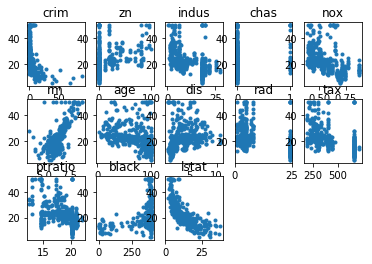

In [24]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

boston_housing = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
                  'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

* plt.plot :  x train에 대해 모든 값. i번째 것을 x축으로 하고, y는 늘 집값으로 해서 뿌려라.

* 분석 --> chas : random / nox : 화학약품, 높으면 반비례해서 집값떨어짐/ rm : 방개수, linear. 비례./ black : index가 커지면 집값 올라감 /lstat : 많으면 집값 떨어짐. / tax : 높으면 집값이 떨어짐. tax가 낮아지면 집값이 올라감. 세금을 많이 내주는 상업건물이 많이 들어오면. 못사는 곳이 tax를 더 많이 냄 ... etc

* 사전 data에 대한 visualization 통해 확인

* data 성질 확인

### 자세히 살펴보면..?

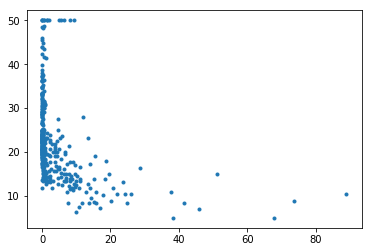

In [25]:
plt.plot(x_train[:,0], y_train, '.')

* * x_train.shape하면 2차원의 data인데, (404,13) 임. 그러나 13개를 다 들고 있으면 안되고 하나만 봐야 함 그럴 때 --> x_train[:,0] 첫번째 factor만 볼 때.

* x는 crime관련 퍼센트. 

* x와 y의 관계가 있으나 linear 관계는 아님.

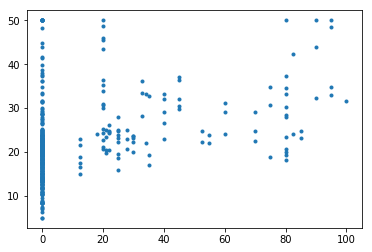

In [26]:
plt.plot(x_train[:,1], y_train, '.')

* 2번째 factor: zn

* random. residential 없는 곳이 집값이 낮게 나오는 경향이 있다. residential 많으면 높게 나옴.

* 0퍼센트가 좀 dense하게 있다.

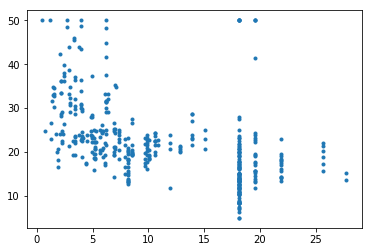

In [27]:
plt.plot(x_train[:,2], y_train, '.')

* 3번째 factor : indus

* non linear한 관계가 보임



# 6. prediction

## 6-1. 가장 높은 집값 만들기

In [28]:
model.predict(np.array([0, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 350, 0]).reshape(1,13))

array([[256.79132]], dtype=float32)

[0, 90, 0, 1, 0,

100, 0, 10, 0, 250, 

13, 350, 0]

--> 이 부분 list.

* list를 np.array를 통해서 array로 바꿔줌 --> reshape해야 하는 이유? model의 input_shape 는 (none,13)이었음. 즉 2차원의 행렬 형태가 되어야 함 = 여기서 이미 형태가 정해졌기 때문에 형태를 유지하기 위하여 (1,13)으로 reshape해 함. 이 list를 여러 개 만들 수도 있다.


* 첫 번째 input factor 0인 이유는? crime은 0에 가까울수록 집값이 높아질 것이라 예측. 

* 두 번째 input factor 90인 이유는? 100으로 갈수록 집값이 높아질 것이라 예측.

## 6-2. 가장 낮은 집값 만들기

In [29]:
model.predict(np.array([100, 10, 25, 0, 1, 
                        50, 100, 0, 25, 700, 
                        23, 0, 30]).reshape(1,13))

array([[62.270317]], dtype=float32)

* 집값을 낮게 하도록 13개의 값을 넣었을 때 전보다는 낮게 나온다.

## <참고> 수업 시간 fitting연습.

### loss를 epochs 수를 늘려 줄여보자.

In [ ]:
model.fit(x_train, y_train, epochs=1000)

* epoch 404개의 데이터 한 번 돌며 씀.

* epochs = 1  --> loss가 나오는데, 5589.. 매우 크다.

* epochs = 10--> loss가 점점 줄어드는 것을 알 수 있음 = 훈련이 되고 있음.

* epochs = 1000 -->loss: 28로 줄었음.

* --> 이 loss를 줄이는 것 필요.

### hidden layer를 추가해보자.

In [21]:
# 1. seqeuntial 설정
model = Sequential()

# 2. hidden layer 10개짜리 들어감.
model.add(Dense(10, input_shape=[13]))

# 3. hidden layer 1개 더 추가 --> 총 2개.
model.add(Dense(20))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________
